In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
#Veri Setinin alınması
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


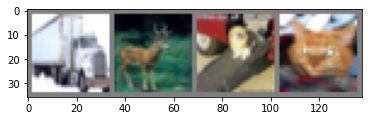

In [4]:
#Görselleştirilmesi
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img=img=img/2 +0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

dataiter=iter(trainloader)#işlemleri hangi sıklıkla yaptığımızı beliteceğiz
images,labels=dataiter.next()#her seferinde batch_size kadar resim üretilecek
imshow(torchvision.utils.make_grid(images))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
        

In [6]:

import torch.optim as optim
net=NN()

#Sınıf sayısı birden fazla olunca
criterion=nn.CrossEntropyLoss()

optimizer=optim.Adam(net.parameters(),lr=0.001)


In [7]:
for img,lab in trainloader:
    print("boyut :",img.size())
    break

boyut : torch.Size([4, 3, 32, 32])


In [9]:
for epoch in range(4): 

    running_loss = 0
    #trainloader resimleri yükle
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        
        #türevleri sıfır yapıyoruz
        optimizer.zero_grad()
        
        pred = net(inputs)
        
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        #her 500^ün katıysa değerleri göster
        if i % 1000 == 0:    
            print('[%d, %5d] loss: %0.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Bitti')

[1,     1] loss: 0.002
[1,  1001] loss: 0.929
[1,  2001] loss: 0.934
[1,  3001] loss: 0.907
[1,  4001] loss: 0.950
[1,  5001] loss: 0.941
[1,  6001] loss: 0.926
[1,  7001] loss: 0.987
[1,  8001] loss: 0.988
[1,  9001] loss: 0.957
[1, 10001] loss: 0.953
[1, 11001] loss: 0.947
[1, 12001] loss: 0.977
[2,     1] loss: 0.001
[2,  1001] loss: 0.927
[2,  2001] loss: 0.896
[2,  3001] loss: 0.909
[2,  4001] loss: 0.921
[2,  5001] loss: 0.899
[2,  6001] loss: 0.950
[2,  7001] loss: 0.950
[2,  8001] loss: 0.910
[2,  9001] loss: 0.937
[2, 10001] loss: 0.954
[2, 11001] loss: 0.953
[2, 12001] loss: 0.990
[3,     1] loss: 0.001
[3,  1001] loss: 0.896
[3,  2001] loss: 0.901
[3,  3001] loss: 0.908
[3,  4001] loss: 0.895
[3,  5001] loss: 0.946
[3,  6001] loss: 0.915
[3,  7001] loss: 0.911
[3,  8001] loss: 0.936
[3,  9001] loss: 0.896
[3, 10001] loss: 0.943
[3, 11001] loss: 0.904
[3, 12001] loss: 0.936
[4,     1] loss: 0.000
[4,  1001] loss: 0.852
[4,  2001] loss: 0.904
[4,  3001] loss: 0.865
[4,  4001] 